# Laboratorio 3 - Regresión lineal

## 1. Entendimiento de los datos - Nicolás Orjuela

Primero se van a importar las librerías

In [1]:
seed = 161
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

import joblib

# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse

# q-q plots
import scipy.stats as stats

#Para hacer el perfilamiento de los datos
from pandas_profiling import ProfileReport

from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
df = pd.read_csv('202210_Laboratorio3_data_DatosTrain.csv', sep=',', encoding = 'utf-8')
df.head()

,Unnamed: 0,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.shape

(2644, 20)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2644.0,1.321500e+03,7.634014e+02,0.0,660.750000,1321.500000,1.982250e+03,2.643000e+03
Life expectancy,2644.0,6.906880e+01,1.035176e+01,0.0,62.975000,72.100000,7.580000e+01,8.900000e+01
Adult Mortality,2644.0,1.624652e+02,1.211870e+02,0.0,73.000000,143.000000,2.262500e+02,6.990000e+02
infant deaths,2644.0,3.114410e+01,1.239323e+02,0.0,0.000000,2.000000,1.800000e+01,1.800000e+03
Alcohol,2644.0,4.328684e+00,4.146851e+00,0.0,0.407500,3.225000,7.495000e+00,1.787000e+01
percentage expenditure,2644.0,7.924656e+02,2.077769e+03,0.0,7.044565,70.648787,4.859596e+02,1.947991e+04
Hepatitis B,2644.0,6.553290e+01,3.922135e+01,0.0,14.750000,87.000000,9.600000e+01,9.900000e+01
Measles,2644.0,2.432923e+03,1.186865e+04,0.0,0.000000,14.000000,3.297500e+02,2.121830e+05
BMI,2644.0,3.766275e+01,2.033975e+01,0.0,18.900000,43.000000,5.590000e+01,8.730000e+01
under-five deaths,2644.0,4.316036e+01,1.684859e+02,0.0,0.000000,3.000000,2.300000e+01,2.500000e+03


In [5]:
df.dtypes

Unnamed: 0                           int64
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  10-19 years              float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

Como se puede observar, todos los datos son numéricos.

In [6]:
df.isnull().sum()

Unnamed: 0                         0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  10-19 years              0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

No hay datos nulos, por lo que se va a emplear la librería ProfileReport de pandas para realizar un perfilamiento completo de los datos y entender que procedimientos realizar para limpiar los datos y que variables escoger para realizar el análisis.

In [7]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

In [8]:
profile.to_file('./report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 2. Identificación de variables a utilizar - Nicolás Orjuela

Se busca que variables tienen una correlacion con la expectativa de vida a través de un pairplot.

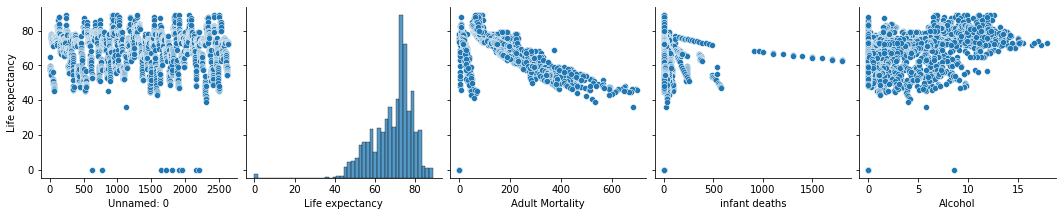

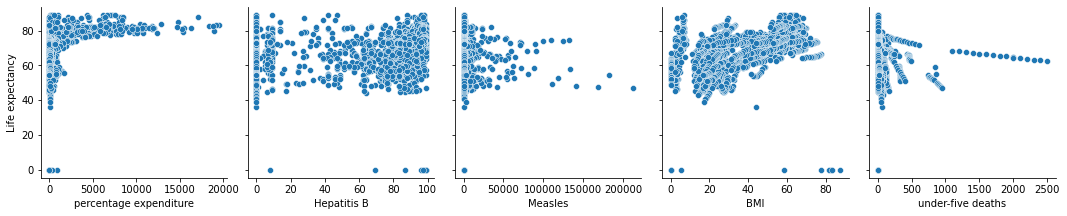

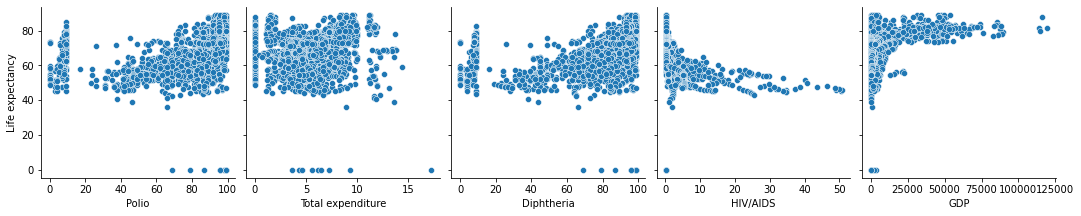

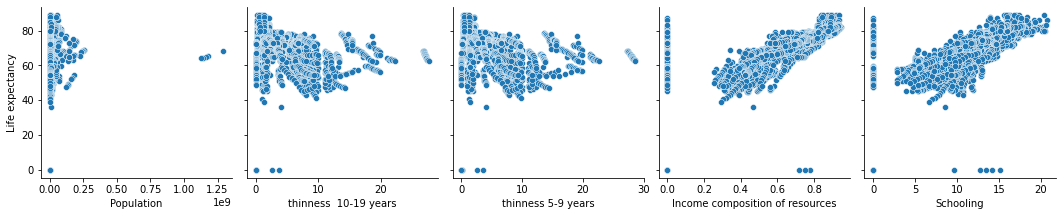

In [9]:
sns.pairplot(df, height=3, y_vars = 'Life expectancy', x_vars = df.columns[0:5], kind='scatter')
sns.pairplot(df, height=3, y_vars = 'Life expectancy', x_vars = df.columns[5:10], kind='scatter')
sns.pairplot(df, height=3, y_vars = 'Life expectancy', x_vars = df.columns[10:15], kind='scatter')
sns.pairplot(df, height=3, y_vars = 'Life expectancy', x_vars = df.columns[15:], kind='scatter')

Tambien se hace una matriz de correlaciones para corroborar qué variables tienen mayor correlación.

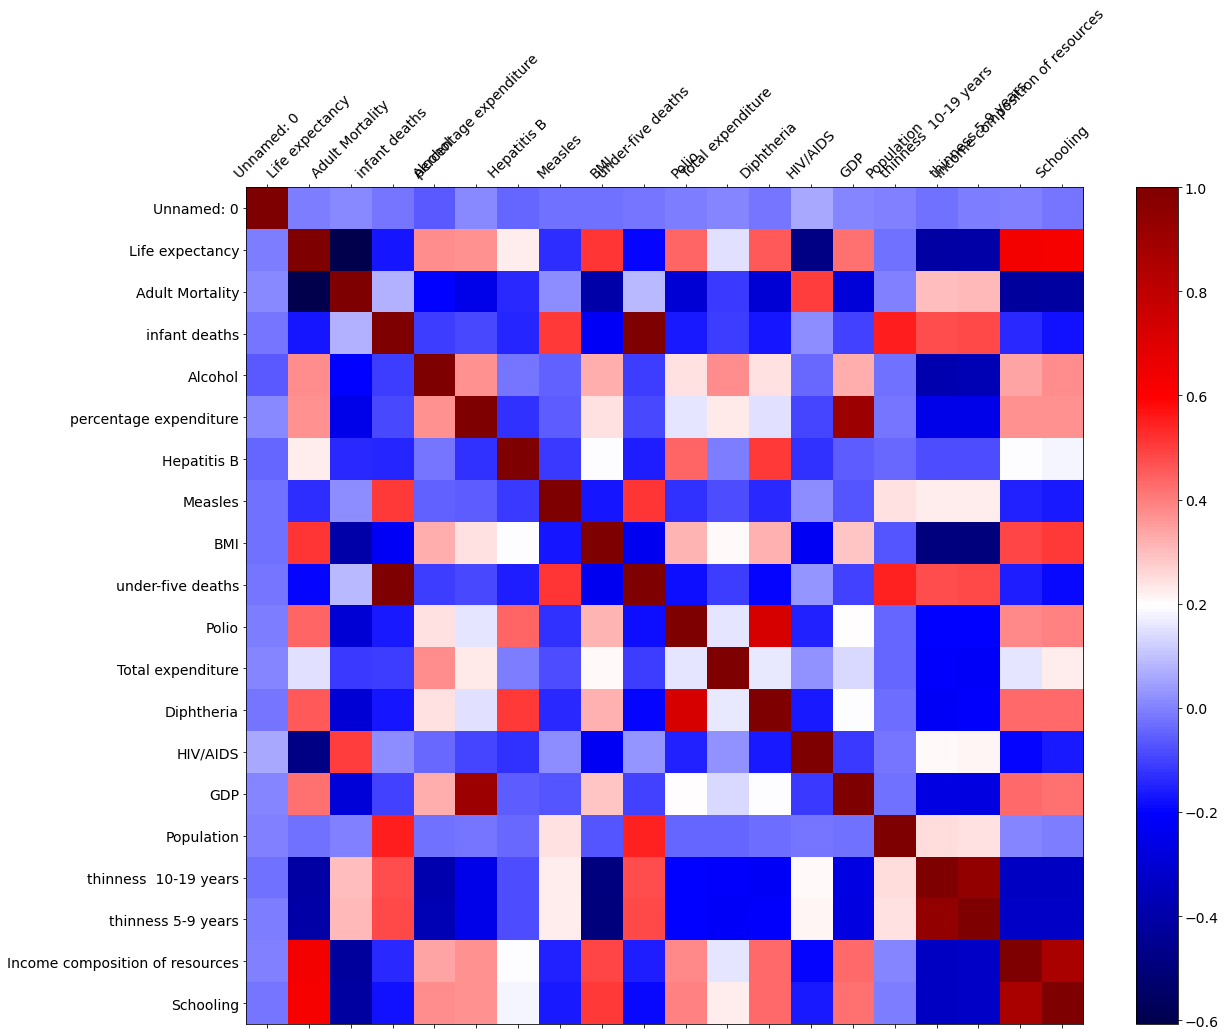

In [10]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number, cmap = 'seismic')
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
_ = cb.ax.tick_params(labelsize=14)

Como se puede observar, las variables Polio, Diphteria, Income composition of resources, Schooling y BMI son las variables que presentan una mayor correlacion tanto en las gráficas como en la matriz, por lo que van a ser las variables escogidas para armar el modelo.

In [11]:
variables_escogidas = df[['Diphtheria','Polio','BMI','Schooling','Income composition of resources', 'Life expectancy']]

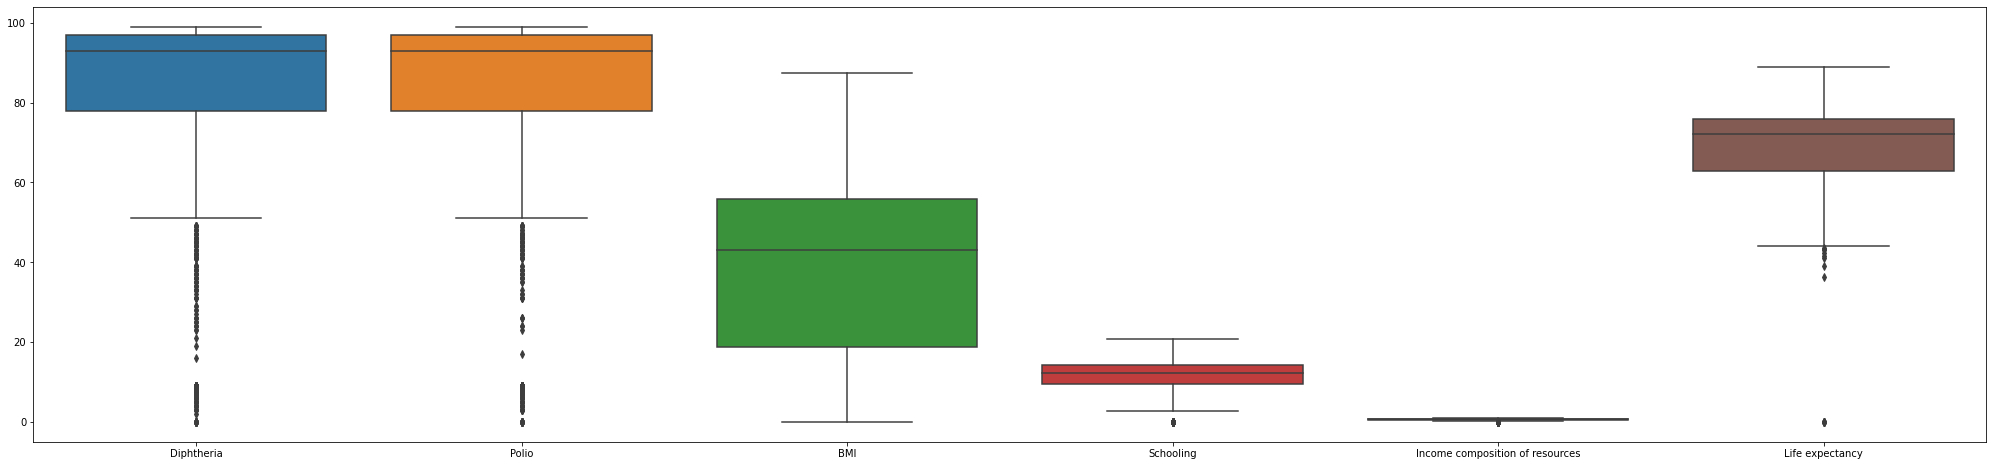

In [12]:
fig=plt.figure(figsize=(35,8))
ax = sns.boxplot(data=variables_escogidas, orient="v")

En esta gráfica se puede observar que las variables escogidas tienen datos atípicos que pueden afectar el análisis.

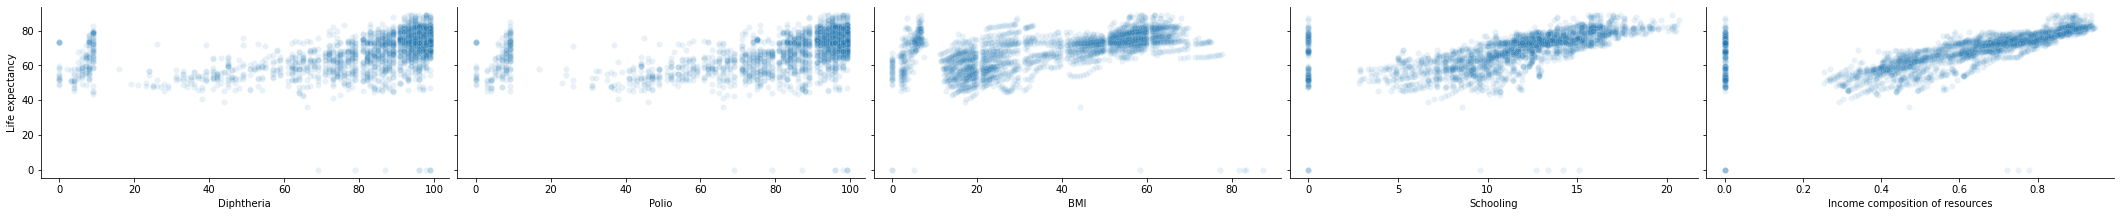

In [13]:
sns.pairplot(df, height=3, aspect=2,y_vars='Life expectancy',x_vars=['Diphtheria','Polio','BMI','Schooling','Income composition of resources'],kind='scatter',plot_kws={'alpha':0.1})

En estas gráficas se puede observar que las curvas tienden a ir hacia abajo, por lo que se estima que haya una relacion polinomial de tercer grado.

## 3. Preparación de los datos - Nicolás Orjuela

Se construye un transformador personalizado para poder eliminar aquellos datos atípicos que se pueden observar en la gráfica anterior.

-1321.5 3964.5
43.73750000000001 95.0375
-156.5 455.5
-25.5 42.5
-11.05 19.83
-923.8029800881249 1562.502017372875
-1.5 154.5
-163.5 272.5
-24.000000000000004 104.80000000000001
-12.0 20.0
68.0 116.0
-1.1199999999999997 12.48
80.5 108.5
-0.05000000000000002 0.35000000000000003
-7097.65300825 12725.900919750002
-4314669.0 7191115.0
-2.0999999999999996 7.5
-2.0 6.800000000000001
0.42887500000000006 1.009875
8.562500000000002 18.862499999999997


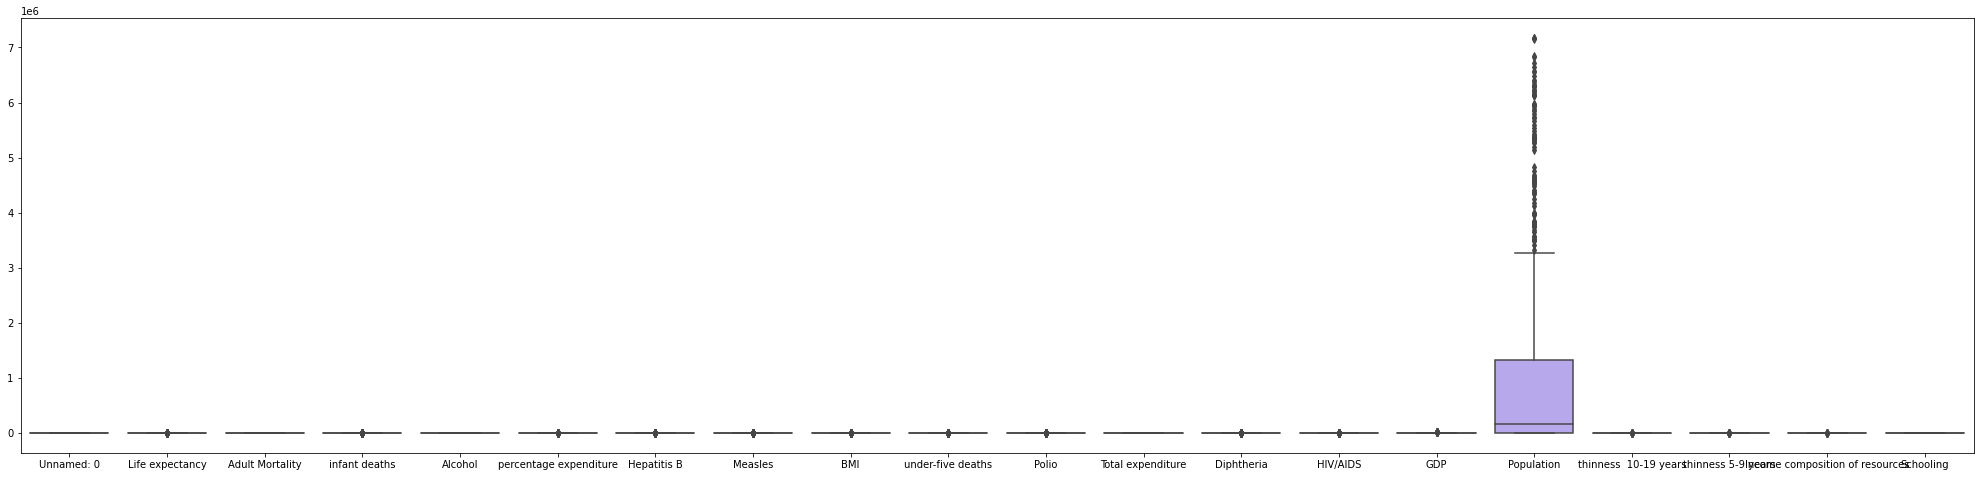

In [14]:
def remove_outliers(data):
    for col in data:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        L = Q1 - 1.5 * IQR 
        U = Q3 + 1.5 * IQR 
        print(L,U)
        data.drop(data[(data[col]>U) | (data[col]<L)].index, inplace=True)
remove_outliers(df)
fig=plt.figure(figsize=(35,8))
ax = sns.boxplot(data=df, orient="v")

Se arma un pipeline con las variables escogidas anteriormente, este pipeline:

**Normaliza los datos** para que estos sean manejados bajo una misma escala.

**Rellena los datos vacíos con el promedio** para que no se manejen datos nulos ni se pierdan filas con infromación valiosa.

**Elimina los datos atípicos** para que estos no afecten el desempeño del modelo al trasladar la posición del hiperplano.

In [15]:
selected_cols = ['Diphtheria','Polio','BMI','Schooling','Income composition of resources']
pre = [('initial',ColumnTransformer([("selector", 'passthrough',selected_cols)])),('scaler', MinMaxScaler()),('Imputer', SimpleImputer(strategy = 'median')),('polynom',PolynomialFeatures(6))]
model = [('model', LinearRegression())]
p1 = Pipeline(pre+model)

X = df.drop(['Life expectancy'], axis = 1)
y = df['Life expectancy']

## 4. Modelamiento

Para el modelo utilizamos LinearRegression(). Como el modelo ya esta acoplado al pipeline solo debemos realizar el fit con las variables ya particionadas en variable objetivo y variables independientes.

In [16]:
p1.fit(X,y)

Pipeline(steps=[('initial',
                 ColumnTransformer(transformers=[('selector', 'passthrough',
                                                  ['Diphtheria', 'Polio', 'BMI',
                                                   'Schooling',
                                                   'Income composition of '
                                                   'resources'])])),
                ('scaler', MinMaxScaler()),
                ('Imputer', SimpleImputer(strategy='median')),
                ('polynom', PolynomialFeatures(degree=6)),
                ('model', LinearRegression())])

## 5. Evaluación cuantitativa

<AxesSubplot:xlabel='Life expectancy'>

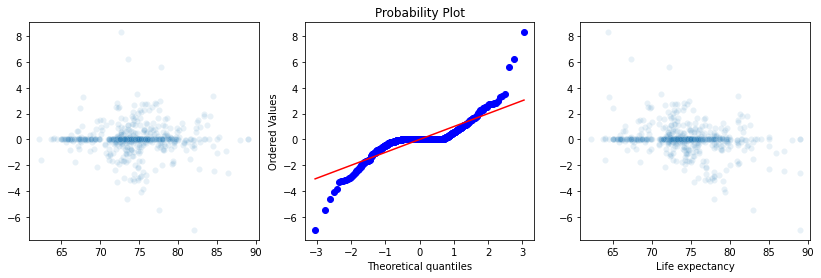

In [17]:
# Revisamos las graficas

# Calculamos los errores
errors = (p1.predict(X) - y).values

fig, axes = plt.subplots(1, 3, figsize = (14,4))

# Dispersión
sns.scatterplot(x = p1.predict(X), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

sns.scatterplot(data  = df, x = 'Life expectancy', y = errors, alpha = 0.1, ax = axes[2])

In [18]:
print("Coeficiente de determinación R^2: ",p1.score(X,y))

Coeficiente de determinación R^2:  0.933404134167108


In [19]:
y_true = y
y_predicted = p1.predict(X)

# Note que hay que sacarle la raiz al valor
print("Root-Mean-Square Error (RMSE):",np.sqrt(mse(y_true, y_predicted)))

Root-Mean-Square Error (RMSE): 1.1461005807192974


Como parte del analisis cuantitativo podemos ver que el R cuadrado es muy bueno, superando el 70% y acercandose a 1. Aunque podemos ver que los valores no son perfectamente lineales y sus distribuciones no se apegan por completo a los supuestos, utilizando un metodo de eliminacion por cuantiles para remover anomalias y la generacion de features polinomicos podemos mejorar bastante y acercarnos a los supuestos.

El RMSE es cercano a 1 pero por encima de lo esperado. Aun asi, hablando desde las estadisticas y metricas del modelo se considera un modelo muy bueno y que podría ser usado para predicción de expectativa de vida.

## 6. Evaluación cualitativa

Como se utilizan muchisimos features polinomicos, 461, es imposible considerar a los coeficientes de la regresión como una evaluación cualitativa validad para determinar que atributos son los mas influenciales en la expecativa de vida de una persona.

In [20]:
result = pd.DataFrame({'features':p1['polynom'].get_feature_names(selected_cols), 'coef':p1['model'].coef_})
pd.set_option('display.max_colwidth', None)
result.sort_values(by=['coef'])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,features,coef
178,Diphtheria Polio Schooling^2 Income composition of resources,-2.980160e+08
210,Polio^2 BMI Schooling Income composition of resources,-2.967240e+08
425,Polio BMI Schooling^2 Income composition of resources^2,-2.773575e+08
291,Diphtheria^2 Polio^2 BMI^2,-2.673030e+08
336,Diphtheria Polio^2 BMI Schooling Income composition of resources,-2.517762e+08
...,...,...
224,Polio BMI Schooling Income composition of resources^2,2.124542e+08
167,Diphtheria Polio^2 BMI Income composition of resources,2.368209e+08
293,Diphtheria^2 Polio^2 BMI Income composition of resources,2.373776e+08
213,Polio^2 Schooling^2 Income composition of resources,2.761384e+08


Estos datos son combinacioes no lineales entre si que son muy dificiles de interpretar. Tanto en el mayor como en el menor coeficiente estan presentes las mismas columnas. Aun asi podemos resaltar que estas 5 columnas consideradas como importantes segun el coeficiente de relación de Pearson, son las mas influenciales para la expecativa de vida de un paciente y deben ser siempre consideradas en los analisis y diagnosticos medicos. 

Es valido recalcar que enfermedades graves como HIV o Hepatitis B se ven opacadas y reemplazadas por variables de ciencia humanas y sociales como Income composition of resources y Schooling.

## 7. Exportación del modelo

Se exporta el modelo utilizando joblib. Como no se tiene el archivo que solo el cliente tiene no hay forma de poder probarlo. Aun asi si se exporta el modelo usando dump con nombre "modelo.joblib"

In [21]:
joblib.dump(p1, "modelo.joblib", compress=0, protocol=None, cache_size=None)

['modelo.joblib']